# CRISP DM

## Bussines Understanding

- Problem
Kasus ini adalah tentang diabetes yang dialami oleh pasien perempuan yang berusia minimal 21 tahun keturunan dari Indian Pima. Indian Pima adalah sekelompok penduduk asli Amerika yang tinggal di Arizona dan sebagian Meksiko.

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
bertujuan untuk memprediksi secara diagnostik apakah pasien menderita diabetes atau tidak, berdasarkan pengukuran diagnostik tertentu yang termasuk dalam dataset.

## Data Understanding

Dari pengumpulan data yang telah diambil mengenai penyakit diabetes, terdapat 9 kolom yang berisi 2 kolom
float64 dan 7 kolom integer. Jika menggunakan Logistic Regression, maka hanya kolom yang berisi float64 
atau int64 saja yang bisa diolah. Berikut atribut-atribut nya :

0. Pregnancies : mempresentasikan berapa kali wanita tersebut hamil selama hidupnya.
1. Glucose: mempresentasikan konsentrasi glukosa plasma pada 2 jam dalam tes toleransi glukosa.
2. Blood Pressure: Tekanan darah adalah cara yang sangat terkenal untuk mengukur kesehatan jantung seseorang, ada juga ukuran tekanan darah yaitu diastolik dan sistolik. Dalam data ini, kita memiliki tekanan darah diastolik dalam (mm / Hg) ketika jantung rileks setelah kontraksi.
3. Skin Thickness: nilai yang digunakan untuk memperkirakan lemak tubuh (mm) yang diukur pada lengan kanan setengah antara proses olecranon dari siku dan proses akromial skapula.
4. Insulin: tingkat insulin 2 jam insulin serum dalam satuan mu U/ml.
5. BMI: Indeks Massa Tubuh (berat dalam kg / (tinggi dalam meter kuadrat), dan merupakan indikator kesehatan seseorang).
6. Diabetes Pedigree Function indikator riwayat diabetes dalam keluarga.
7. Age: umur wanita suku indian pima (years) 
8. Outcome: Class variable (0 or 1), 0 untuk tidak mengidap diabetes, dan 1 mengidap diabetes.

# Import library

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# DATA PREPARATION

# pisahkan data atribut dengan label

In [6]:
X = df.drop(columns=['Outcome'], axis=1)
Y = df['Outcome']

In [7]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [8]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Visualisasi Data

In [9]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


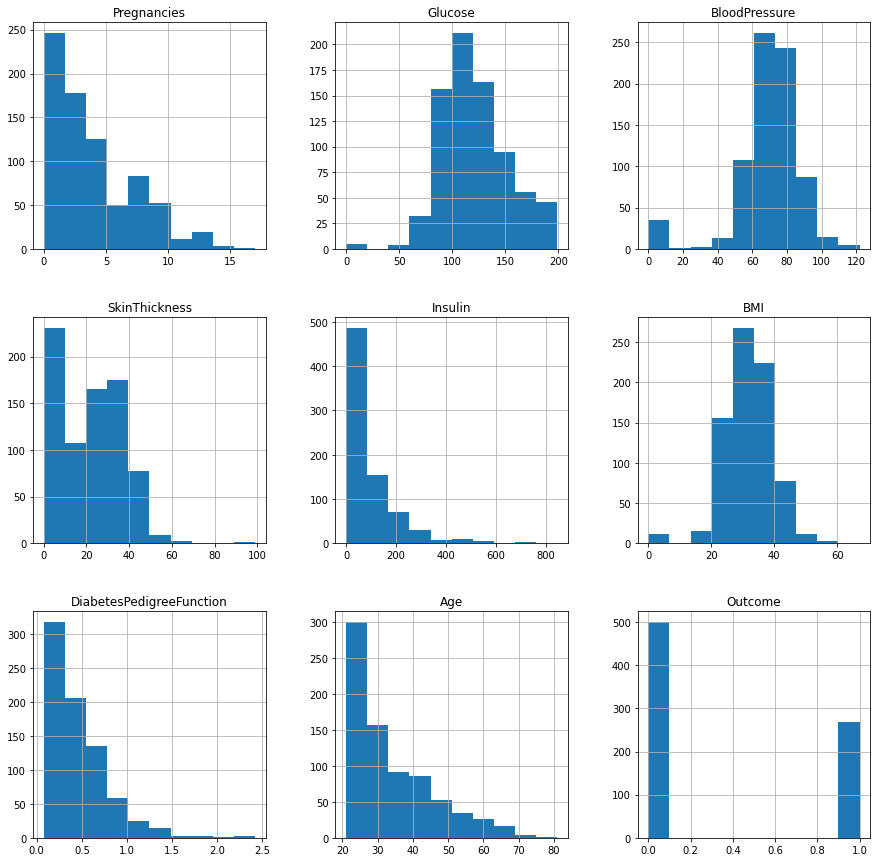

In [11]:
p = df.hist(figsize = (15,15))

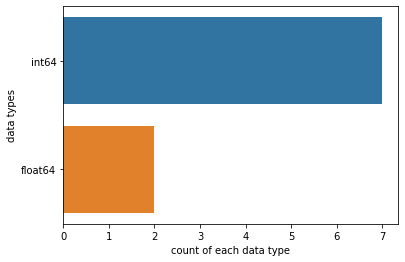

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y=df.dtypes ,data=df)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

# Split data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [16]:
print(X.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


# MODELLING DATA

# Membuat model training

In [17]:
model = LogisticRegression()

In [18]:
model.fit(x_train, y_train)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# EVALUATION

# Evaluasi model

In [19]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [20]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.7850162866449512


In [22]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [23]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.7532467532467533


# Model Prediksi

In [25]:
input_data = (1, 85, 66, 29, 0, 26.6, 0.351, 31)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
predict = model.predict(data_reshaped)
print(predict)

if (predict[0] == 0):
    print('Pasien Tidak Memiliki Penyakit Diabetes')
else:
    print('Pasien Memiliki penyakit Diabetes')

[0]
Pasien Tidak Memiliki Penyakit Diabetes


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# DEPLOYMENT

# Save Model

In [26]:
import pickle

filename = 'diabetes.sav'
pickle.dump(model, open(filename, 'wb'))